In [13]:
from lib import Coinimage
from skimage import io
import numpy as np
import cv2 as cv

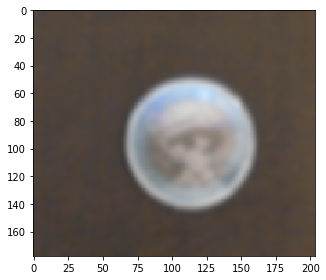

In [14]:
image = cv.imread('./testimages/tmp.png', cv.IMREAD_COLOR)
#coin = Coinimage()
#image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
res = cv.GaussianBlur(image, (9, 9), 0)
io.imshow(res)

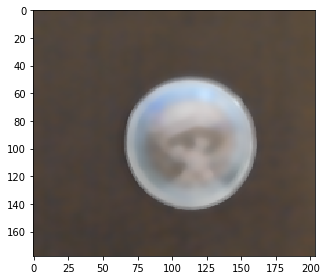

In [15]:
res = cv.bilateralFilter(image, 9, 75, 75)
io.imshow(res)

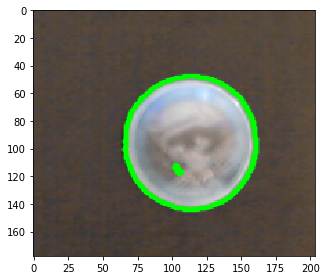

In [16]:
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(grey, 100, 255, cv.THRESH_BINARY)
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = image.copy()
cv.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

# see the results
cv.imshow('None approximation', image_copy)
io.imshow(image_copy)

# Ansatz zur verwendung der Hafftransformation

In [41]:
image = cv.imread('./testimages/0.png', cv.IMREAD_COLOR)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
src = image.copy()

blured = cv.medianBlur(gray, 5)

rows = gray.shape[0]

In [42]:
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30, minRadius=10)

x=364, y=260, radius=52


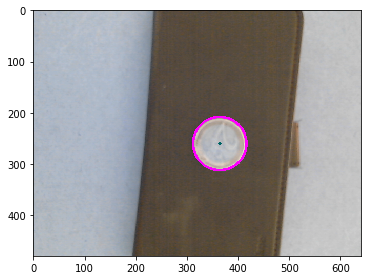

In [43]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        print(f"x={i[0]}, y={i[1]}, radius={i[2]}")
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)

io.imshow(src)

## bestimmung der durchschnittsfarbe

In [45]:
def swapAxis(circles) -> np.array:
    swapedAxes = []
    for element in circles:
        element = element[0]
        swapedAxes.append((element[1], element[0], element[2]))
    return np.array(swapedAxes)


def getMinSquare(circle) -> (int, int, int, int):
    return circle[0] - circle[2], circle[0] + circle[2], circle[1] - circle[2], circle[1] + circle[2]


def getCoinOnly(circle, image)-> np.array:
    result = []
    circleX = circle[0]
    circleY = circle[1]
    radius = circle[2]
    xMin, xMax, yMin, yMax = getMinSquare(circle)
    for x in range(xMin, xMax):
        for y in range(yMin, yMax):
            dx = x - circleX
            dy = y - circleY
            squareDistance = dx**2+dy**2
            if squareDistance <= radius**2:
                result.append(image[x,y])
    return np.array(result)


med = getCoinOnly(circle, image)
med
#tmp = swapAxis(circles)
#xMin, xMax, yMin, yMax = getMinSquare(tmp[0])
#io.imshow(image[xMin:xMax, yMin:yMax])

IndexError: index 1 is out of bounds for axis 0 with size 1

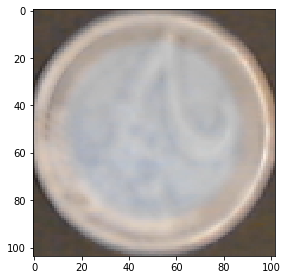

In [32]:
circle = circles[0]
#               y         x
coin = image[210:314, 314:416]  # hier ist x und y vertauscht warum?
io.imshow(coin)

In [21]:
# evtl noch berücksichtigen -> ausserhalb der Münze Farbe mit neutral gewichten
colorR = np.mean(coin[:, :, 0])
colorG = np.mean(coin[:, :, 1])
colorB = np.mean(coin[:, :, 2])
color = (colorR, colorG, colorB)
color

(134.3805357142857, 142.04410714285714, 155.0232142857143)